In [1]:
%matplotlib inline

In [2]:
from defs import *

## Here is my data

In [3]:
Ma_arr = [17.9, 27.0, 96.3, 95.0, 97.0, 120.0, 135.5, 154.7, 377.0, 379.0]
Ma_upper_arr = [17.8, 23.03, 93.9, 93.9, 93.9, 119.0, 126.0, 152.1, 377.0, 375.0]
Ma_lower_arr = [18.1, 28.1, 97.0, 97.0, 97.0, 121.0, 145.0, 157.3, 379.0, 382.0]
Ph_arr = [-30.0, -31.2, -30.6, -30.1, -30.1, -32.2, -29.189, -30.8575, -32.3, -31.7]
K0_arr = [ 0.041,  0.035,  0.024,  0.025,  0.025,  0.031,  0.025,  0.032,  0.026,  0.027,  ]
δa_arr = [1.55, 2.1, 2.1, 0.99, 1.19, 2.28, 1.3, 2.1, 0.89, 0.8]
TC_arr = [13.5, 18.22, 32.5, 32.0, 32.0, 22.461666666666666, 31.0, 22.0, 30.0, 28.0]

In [4]:
N=len(Ph_arr)
print("Number of Data Points:",N)

Number of Data Points: 10


## Calculate the pC02

In [5]:
reset()
for i in range(N):        # run through all the data points
    Ph=Q(Ph_arr[i],0.5/2)
    R=Q(3.33,1.34/2)               # Schouten 1998, Oakes et al 2005, etc offset between biomass and phytane
    δp=Ph+R
    δa=Q(δa_arr[i],0.2/2)
    
    TC=Q(TC_arr[i],3/2)    # when MM and Anom are given, this is MM+Anom.  If not, then use the MP
    TK=TC+273.15
    ϵb=24.12-9866/TK  
    δd=δa-1+ϵb
    ϵp=1000*((δd+1000)/(δp+1000)-1)  
    
    S=34   
    K0=calc_K0(TC,S)
    
    b=170     #uncertainty here is high? Pagani 2014 paper figure 2 - we don't have phosphate data
              #b=Q(170,50,250)
    ϵf=26.5   # +- ?    
    
    dissolved_CO2=b/(ϵf-ϵp)
    
    pCO2=dissolved_CO2/K0
    
    store(pCO2.median,pCO2.percentile95[1],pCO2.percentile95[0])
    
y,yu,yl=recall()
x=Ma_arr
xu=Ma_upper_arr
xl=Ma_lower_arr

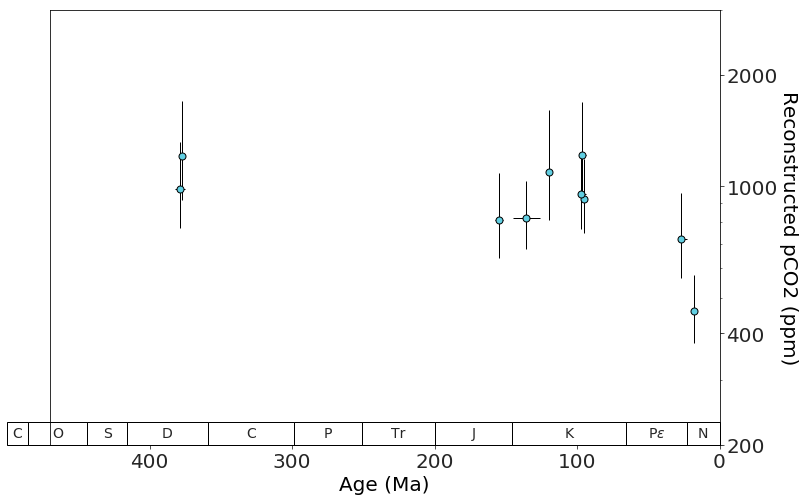

In [6]:
make_plot(x,xl,xu,y,yl,yu)